# CODING

## Setup

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
# Settings
sns.set_style('whitegrid')
# Make static images plots embedded in the notebook
%matplotlib inline

In [3]:
# Get the Data and create the data frame
path = './Data/'
filename = 'titanic-data.csv'
test = 'testTitanic.csv'
titanic = pd.read_csv(path+filename)
test = pd.read_csv(path+test)

## Data Summary

In [4]:
# First rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# last rows
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Summary of data
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# the index values
titanic.index

RangeIndex(start=0, stop=891, step=1)

## Data type, size, missing and duplicated values

In [8]:
# Data frame summary 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


  variableType  count
0        int64      5
1       object      5
2      float64      2


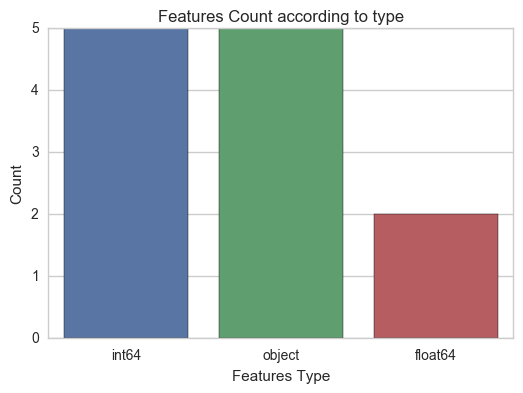

In [9]:
# Plot Feature Type graph
df = pd.DataFrame(titanic.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
print df
sns.barplot(data=df,x="variableType",y="count")
ax.set(xlabel='Features Type', ylabel='Count')
plt.title("Features Count according to type")
# Save figure in file
plt.savefig('TypeOfFeatures.png')
plt.show()

In [10]:
# size of the data frame
titanic.shape

(891, 12)

In [11]:
# Percentage of NaN values in data frame
print "Percentage of NaN values for Cabin feature: " + \
    repr(titanic.Cabin.isnull().sum()*100.0/titanic.shape[0])
print "Percentage of NaN values for Age feature: " + \
    repr(titanic.Age.isnull().sum()*100.0/titanic.shape[0])
print "Percentage of NaN values for Embarked feature: " + \
    repr(titanic.Embarked.isnull().sum()*100.0/titanic.shape[0])

Percentage of NaN values for Cabin feature: 77.104377104377107
Percentage of NaN values for Age feature: 19.865319865319865
Percentage of NaN values for Embarked feature: 0.22446689113355781


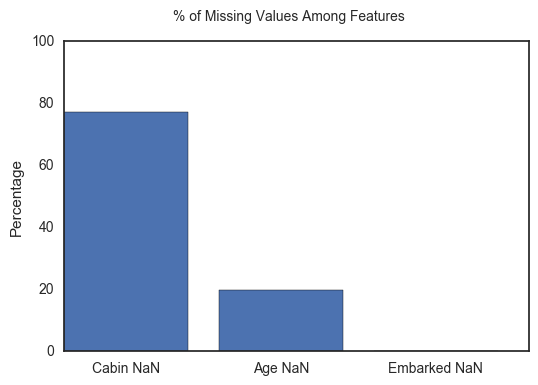

In [12]:
# Plot Missing Values Graph
plt.style.use('seaborn-white')

labels = ['Cabin NaN', 'Age NaN', 'Embarked NaN']
x_pos = np.arange(len(labels))
width = 0.8
Cabin_NaN = titanic.Cabin.isnull().sum()*100.0/titanic.shape[0]
Age_NaN = titanic.Age.isnull().sum()*100.0/titanic.shape[0]
Embarked_NaN = titanic.Embarked.isnull().sum()*100.0/titanic.shape[0]
vals = (Cabin_NaN,Age_NaN,Embarked_NaN)

plt.bar(x_pos,vals)
plt.suptitle('% of Missing Values Among Features')
plt.xticks(x_pos)
plt.xticks(x_pos+width/2.0, labels)
plt.ylabel('Percentage')
axes = plt.gca()
axes.set_ylim([0,100])
# Save figure in file
plt.savefig('MissingDataAmongFeatures.png')
plt.show()

In [13]:
# Is there any missing and duplicate value for Name feature? 
print "# unique values: ",len(titanic['Name'].unique())
print "# null values:",titanic['Name'].isnull().sum()

# unique values:  891
# null values: 0


In [14]:
# Is there any missing and duplicate value for Ticket feature? 
print "# unique values: ",len(titanic['Ticket'].unique())
print "# null values:",titanic['Ticket'].isnull().sum()
print "# duplicates: ", len(titanic.set_index('Ticket').index.get_duplicates())

# unique values:  681
# null values: 0
# duplicates:  134


In [15]:
print "duplicates are:"
titanic.set_index('Ticket').index.get_duplicates()

duplicates are:


['110152',
 '110413',
 '110465',
 '111361',
 '113505',
 '113572',
 '113760',
 '113776',
 '113781',
 '113789',
 '113798',
 '113803',
 '113806',
 '11668',
 '11751',
 '11767',
 '11967',
 '12749',
 '13502',
 '13507',
 '1601',
 '16966',
 '17421',
 '17453',
 '17474',
 '19877',
 '19928',
 '19943',
 '19950',
 '19996',
 '220845',
 '230080',
 '230136',
 '230433',
 '231919',
 '237736',
 '239853',
 '239865',
 '24160',
 '243847',
 '244252',
 '244367',
 '248727',
 '248738',
 '250644',
 '250647',
 '250649',
 '250655',
 '2627',
 '26360',
 '2651',
 '2653',
 '2659',
 '2661',
 '2665',
 '2666',
 '2668',
 '2678',
 '2691',
 '2699',
 '28403',
 '2908',
 '29106',
 '29750',
 '3101278',
 '3101295',
 '31027',
 '345764',
 '345773',
 '347054',
 '347077',
 '347080',
 '347082',
 '347088',
 '347742',
 '349237',
 '349909',
 '35273',
 '35281',
 '358585',
 '363291',
 '364516',
 '364849',
 '367226',
 '367230',
 '36928',
 '36947',
 '36973',
 '370129',
 '370365',
 '371110',
 '376564',
 '382652',
 '392096',
 '4133',
 '54636'

In [16]:
## Is there any missing and duplicate value for Cabin feature? 
print "# of unique values: ",len(titanic['Cabin'].unique())
print "# nb of null values:",titanic['Cabin'].isnull().sum()
# how to deal with Cabin Feature missing values?
# option 1: set to zero/default -> No
# option 2: mean : does not make sense for an ordinal feature
# option 3: ignore in computation: YES
print "# nb of duplicates: ", len(titanic.set_index('Cabin').index.get_duplicates())

# of unique values:  148
# nb of null values: 687
# nb of duplicates:  47


In [17]:
print "duplicates are:"
titanic.set_index('Cabin').index.get_duplicates()

duplicates are:


[nan,
 'B18',
 'B20',
 'B22',
 'B28',
 'B35',
 'B49',
 'B5',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B77',
 'B96 B98',
 'C123',
 'C124',
 'C125',
 'C126',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C52',
 'C65',
 'C68',
 'C78',
 'C83',
 'C92',
 'C93',
 'D',
 'D17',
 'D20',
 'D26',
 'D33',
 'D35',
 'D36',
 'E101',
 'E121',
 'E24',
 'E25',
 'E33',
 'E44',
 'E67',
 'E8',
 'F G73',
 'F2',
 'F33',
 'F4',
 'G6']

In [18]:
# Is there any missing and duplicate value for Embarked feature? 
print "# unique values: ",len(titanic['Embarked'].unique())
print "# null values:",titanic['Embarked'].isnull().sum()
# how to deal:
# option 1: set to most frequent -> YES
# option 2: discard value or observation
print "# duplicates: ", len(titanic.set_index('Embarked').index.get_duplicates())
print "duplicates are:"
titanic.set_index('Embarked').index.get_duplicates()

# unique values:  4
# null values: 2
# duplicates:  4
duplicates are:


[nan, 'C', 'Q', 'S']

Embarked
C    168
Q     77
S    644
dtype: int64


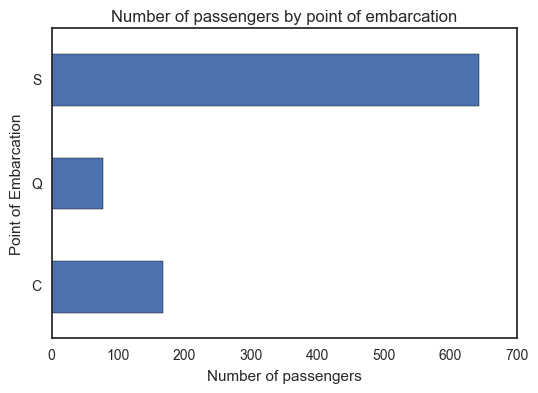

In [19]:
# Analysis with Group by Embarked
# where most people embarked?
# conclusion:  at Southampton
Embarked = ['C','Q','S']
print titanic.groupby([titanic.Embarked]).size()
titanic.groupby([titanic.Embarked]).size().plot(kind='barh')
plt.ylabel('Point of Embarcation')
plt.yticks(np.arange(3), Embarked)
plt.xlabel('Number of passengers')
plt.title('Number of passengers by point of embarcation')
plt.savefig('NbPassengersByEmbarcationPt.png')
plt.show()

In [20]:
# which are the two empty values?
print titanic[titanic.Embarked.isnull()]

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


## Processing missing values for Embarked feature

In [21]:
# Processing missing values: 
# how to deal: 
# option 1: retrieve the actual values
# option 2: set the value where most of people embarked (i.e. Southampton) 
# we are able to get the actual value from research -> Both passengers embarked at Southampton
# replace with the actual value: S (i.e. Southampton)
titanic.loc[829,'Embarked'] = 'S'
titanic.loc[61,'Embarked'] = 'S'

## Create new Title feature

In [22]:
# Create new feature: Title
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if string.find(big_string, substring) != -1:
            return substring
    print big_string
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

titanic['Title']=titanic['Name'].map(lambda x: substrings_in_string(x, title_list))
 
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
titanic['Title']=titanic.apply(replace_titles, axis=1)

## Relation between Fare, Embarked and Class 

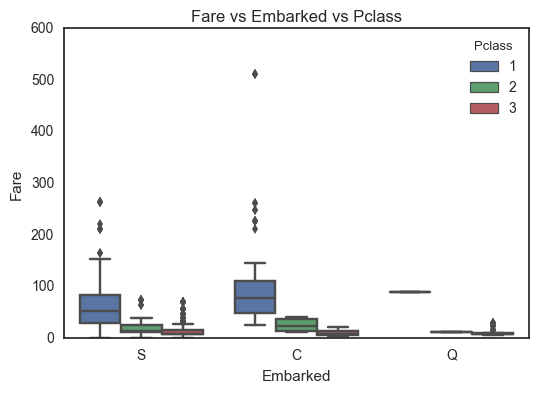

In [23]:
# Use of Box plot
sns.boxplot(x="Embarked",y="Fare", data=titanic,hue='Pclass')
plt.title('Fare vs Embarked vs Pclass')
plt.savefig('boxplotFarevsEmbarkedvsPclass.png')

##  Change feature representation for Embarked feature

In [24]:
# Change feature representation for Embarked feature
titanic = pd.get_dummies(titanic,columns=['Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr,0,0,1


## Processing missing values for Age

In [25]:
# Is there any missing value for Age feature?
# how to deal: 
# option 1: set to zero -> NO
# option 2: set mean 
# from the overall population -> NO
# from groups: Title -> YES
# option 3: discard values or observation -> NO
# this feature is continuous: no need to look for unique values and duplicates

In [26]:
# First get the median values per Title.
df = titanic.groupby('Title')
df_fillna = df.Age.median()
print df_fillna

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64


In [27]:
# Replace missing values for Age with the median value of the group split by title
for idx in titanic[titanic.Age.isnull()].index:
    title = titanic.loc[idx,'Title']
    titanic.loc[idx,'Age'] = df_fillna[title]

## Change feature representation for Sex feature

In [28]:
# Change feature representation for Sex feature:
titanic = pd.get_dummies(titanic,columns=['Sex'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mrs,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mrs,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Mr,0,0,1,0,1


## Change feature representation for Title feature

In [29]:
# Change feature representation for Title feature
titanic = pd.get_dummies(titanic,columns=['Title'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1,0


## Build new feature Child

In [30]:
# Build new feature Child
for ix in titanic.index:
    #print ix
    age = titanic.loc[ix,'Age']
    if age >= 18:
        titanic.loc[ix,'Child'] = 0
    elif age < 18:
        titanic.loc[ix,'Child'] = 1
    else:
        titanic.loc[ix,'Child'] = np.nan

## Features distribution

In [31]:
# what sex is the most common
titanic.Sex_male.describe()

count    891.000000
mean       0.647587
std        0.477990
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sex_male, dtype: float64

In [32]:
titanic.skew()

PassengerId     0.000000
Survived        0.478523
Pclass         -0.630548
Age             0.438220
SibSp           3.695352
Parch           2.749117
Fare            4.787317
Embarked_C      1.595149
Embarked_Q      2.948778
Embarked_S     -1.009665
Sex_female      0.618921
Sex_male       -0.618921
Title_Master    4.403096
Title_Miss      1.469548
Title_Mr       -0.391769
Title_Mrs       1.911042
Child           2.186926
dtype: float64

In [33]:
titanic.median()

PassengerId     446.0000
Survived          0.0000
Pclass            3.0000
Age              30.0000
SibSp             0.0000
Parch             0.0000
Fare             14.4542
Embarked_C        0.0000
Embarked_Q        0.0000
Embarked_S        1.0000
Sex_female        0.0000
Sex_male          1.0000
Title_Master      0.0000
Title_Miss        0.0000
Title_Mr          1.0000
Title_Mrs         0.0000
Child             0.0000
dtype: float64

In [34]:
titanic.mode()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Child
0,NaN,0.0,3.0,NaN,30.0,0.0,0.0,1601,8.05,B96 B98,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Summarize about Age
Mean: 29.377295174
Mode: 0    30.0
dtype: float64
Median: 30.0
Standard deviation: 13.25424584
Minimum: 0.42
Maximum: 80.0


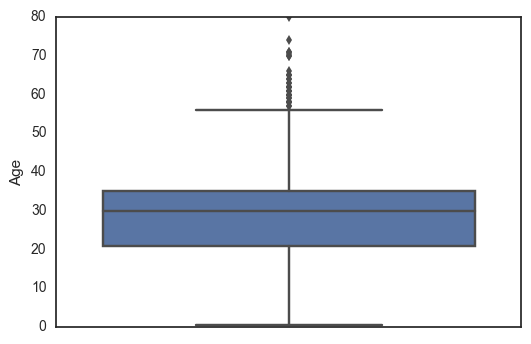

In [35]:
def describe_data(data):
    print 'Mean:', data.mean()
    print 'Mode:',data.mode()
    print 'Median:', data.median()
    print 'Standard deviation:', data.std()
    print 'Minimum:', data.min()
    print 'Maximum:', data.max() 

# Summarize the data
print "Summarize about Age"
describe_data(titanic.Age)

sns.boxplot(y="Age", data=titanic)
plt.savefig('boxplotAge.png')

Summarize about Fare
Mean: 32.2042079686
Mode: 0    8.05
dtype: float64
Median: 14.4542
Standard deviation: 49.6934285972
Minimum: 0.0
Maximum: 512.3292


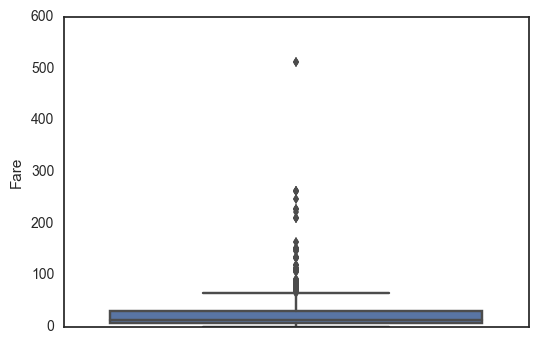

In [36]:
# Summarize the data for FARE feature
print "Summarize about Fare"
describe_data(titanic.Fare)

# display the boxplot
sns.boxplot(y="Fare", data=titanic)
plt.savefig('boxplotFare.png')

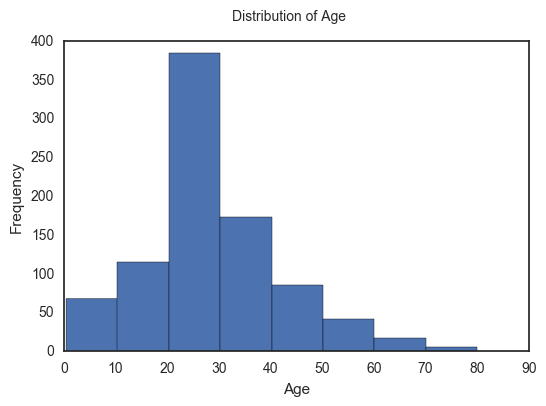

In [37]:
# Distribution of Age
plt.style.use('seaborn-white')
titanic.Age.plot.hist(bins=8)
plt.suptitle('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axis([0, 90, 0, 400])
plt.savefig('AgeDistribution.png')
plt.show()

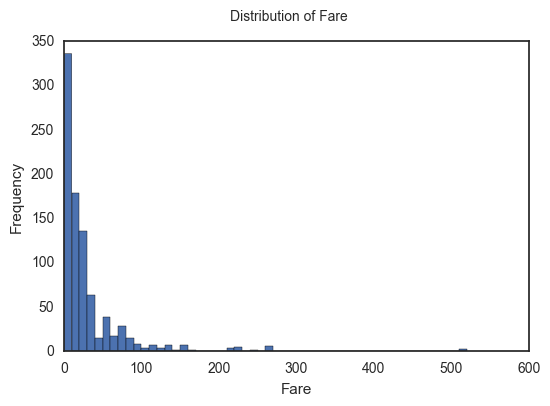

In [38]:
# Distribution of fare
plt.style.use('seaborn-white')
#fig = plt.figure()
binwidth = 10
bins = np.arange(min(titanic.Fare), max(titanic.Fare) + binwidth, binwidth)
plt.hist(titanic.Fare, bins=bins)
#titanic.Fare.hist(bins=bins)
plt.suptitle('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.savefig('FareDistribution.png')
plt.show()

## 6. Relation between features

In [39]:
# Drop unused variables
# PassengerId is useless since it is redundant with titanic.index
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
print titanic.columns.values

['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q'
 'Embarked_S' 'Sex_female' 'Sex_male' 'Title_Master' 'Title_Miss'
 'Title_Mr' 'Title_Mrs' 'Child']


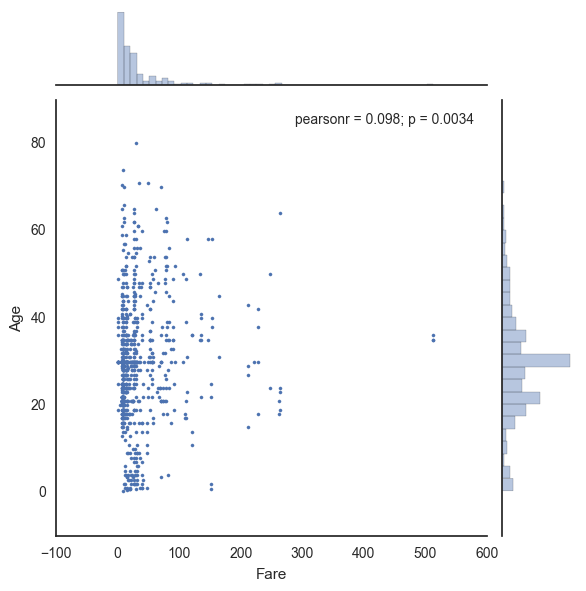

In [40]:
# looking for any relation between the two continous features, if any
sns.jointplot(x="Fare", y="Age", data=titanic,marker='.')
plt.savefig('RelationFarevsAge.png')

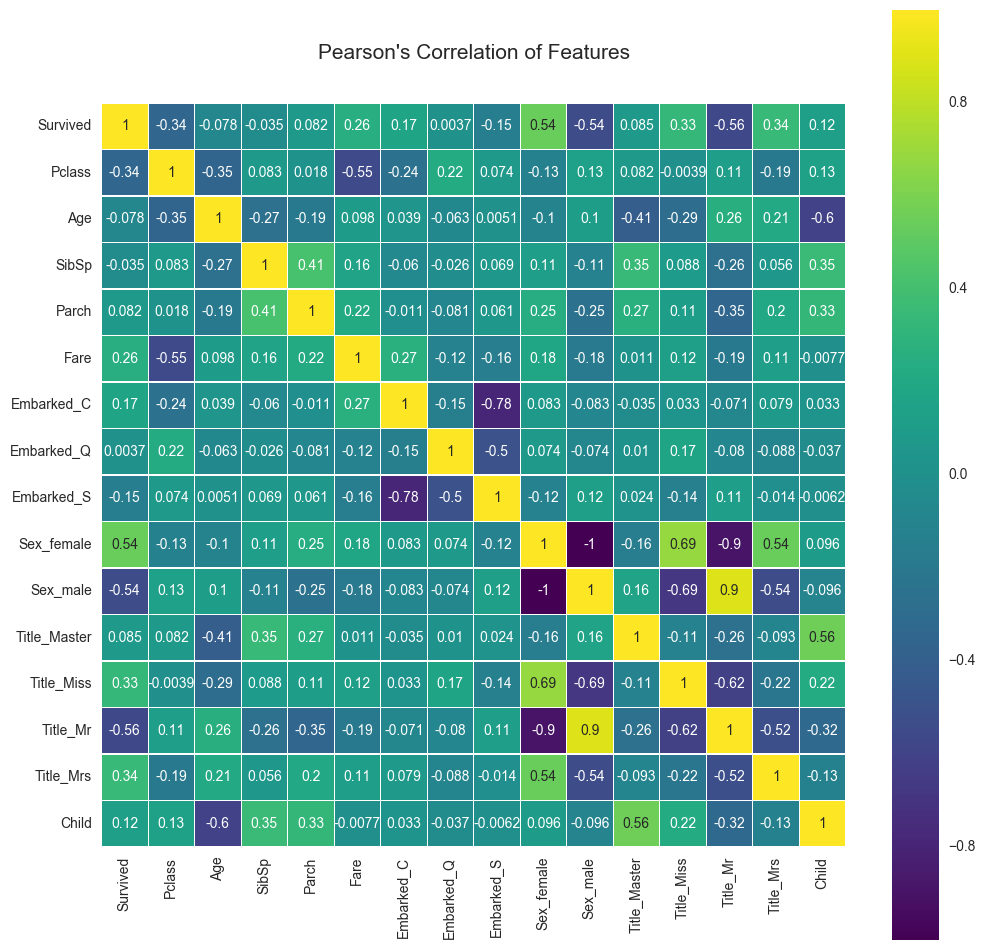

In [41]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title("Pearson's Correlation of Features", y=1.05, size=15)
sns.heatmap(titanic.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('PearsonCorrelationOfFeatures.png')
plt.show()

Pclass and Fare are linked

Master and Age are inversely linked

SibSp and Parch are linked

## Influence of factors on Survival

In [42]:
print titanic.columns.values

['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q'
 'Embarked_S' 'Sex_female' 'Sex_male' 'Title_Master' 'Title_Miss'
 'Title_Mr' 'Title_Mrs' 'Child']


In [43]:
#sns.swarmplot(x="Survived", y="Age", data=titanic, hue="Title_Miss")
#plt.savefig('SexFactorv2.png')

In [44]:
#sns.swarmplot(x="Survived", y="Age", data=titanic, hue="Title_Mrs")
#plt.savefig('SexFactorv3.png')

In [45]:
#sns.swarmplot(x="Survived", y="Age", data=titanic, hue="Title_Master")

In [46]:
titanic = pd.get_dummies(titanic,columns=['Pclass'])
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Child,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0.0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1,0.0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,1,0,0,0.0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,1,0.0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0.0,0,0,1


          Pclass_1  Pclass_2  Pclass_3
Survived                              
0             80.0      97.0     372.0
1            136.0      87.0     119.0


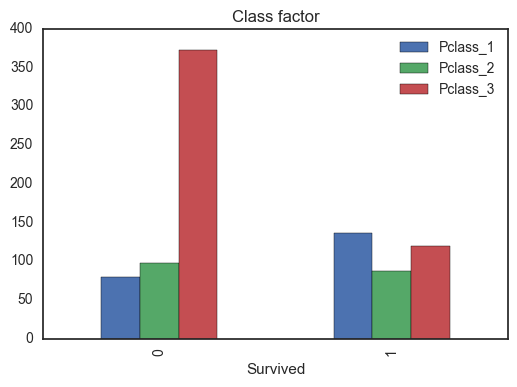

In [47]:
grouped_data = titanic.groupby('Survived')
df = grouped_data['Pclass_1','Pclass_2','Pclass_3'].sum()
print df
df.plot(kind='bar',title='Class factor')
plt.savefig('ClassFactorv2.png')
plt.show()

          Embarked_C  Embarked_Q  Embarked_S
Survived                                    
0               75.0        47.0       427.0
1               93.0        30.0       219.0


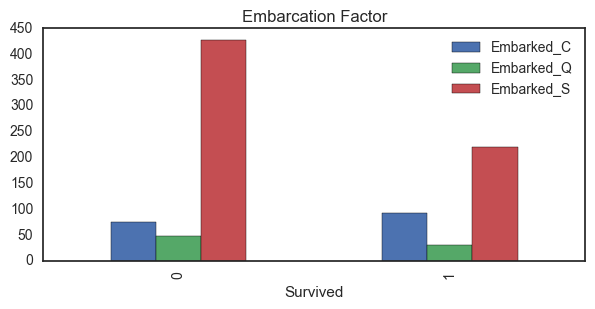

In [49]:
# Analysis with Group by survived
grouped_data = titanic.groupby('Survived')
df = grouped_data['Embarked_C','Embarked_Q','Embarked_S'].sum()
print df
plt.style.use('seaborn-white')
df.plot(kind='bar',figsize=(7,3),title='Embarcation Factor')
#fig = plt.figure()
#fig = plt.gcf()
plt.savefig('EmbarcationFactor.png')
plt.show()

          Sex_female  Sex_male
Survived                      
0               81.0     468.0
1              233.0     109.0


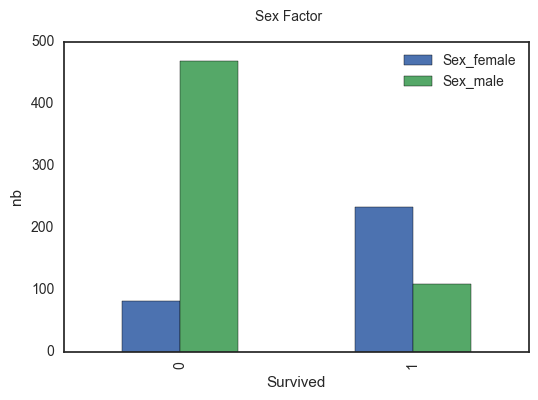

In [50]:
grouped_data = titanic.groupby('Survived')
df = grouped_data['Sex_female','Sex_male'].sum()
print df
plt.style.use('seaborn-white')
#fig = plt.figure()
df.plot(kind='bar')
plt.suptitle('Sex Factor')
plt.xlabel('Survived')
plt.ylabel('nb')
plt.savefig('SexFactor.png')
plt.show()

          Title_Master  Title_Miss  Title_Mr  Title_Mrs
Survived                                               
0                 17.0        54.0     447.0       31.0
1                 23.0       128.0      84.0      107.0


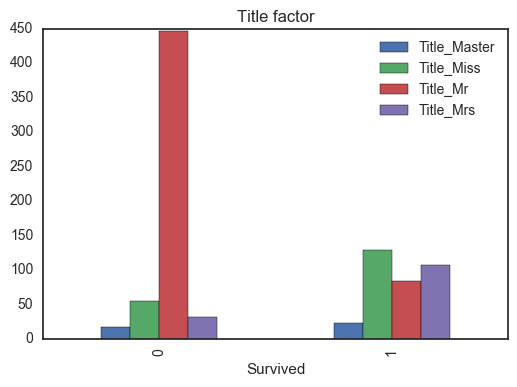

In [51]:
grouped_data = titanic.groupby('Survived')
df = grouped_data['Title_Master','Title_Miss','Title_Mr','Title_Mrs'].sum()
print df
df.plot(kind='bar',title='Title factor')
plt.savefig('TitleFactor.png')
plt.show()

In [52]:
titanic = pd.get_dummies(titanic,columns=['Child'])
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Pclass_1,Pclass_2,Pclass_3,Child_0.0,Child_1.0
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,0,1,1,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,1,0,0,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,1,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,0,1,1,0


In [53]:
titanic.rename(columns={'Child_0.0': 'NotChild', 'Child_1.0': 'IsChild'}, inplace=True)

          NotChild  IsChild
Survived                   
0            495.0     54.0
1            279.0     63.0


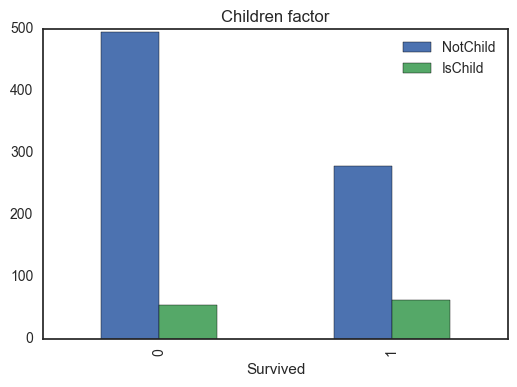

In [54]:
grouped_data = titanic.groupby('Survived')
df = grouped_data['NotChild','IsChild'].sum()
print df
df.plot(kind='bar',title='Children factor')
plt.savefig('ChildFactorv2.png')
plt.show()